In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.null_model import ER
from VirusHostNetworkAnalysis.null_model import ConfigurationModel
from VirusHostNetworkAnalysis.properties import BipartiteGraph

In [4]:
import sys
myco = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs.tsv')
myco.make_rectangular_matrix()
sys.getsizeof(myco.virus_host_array)


60605

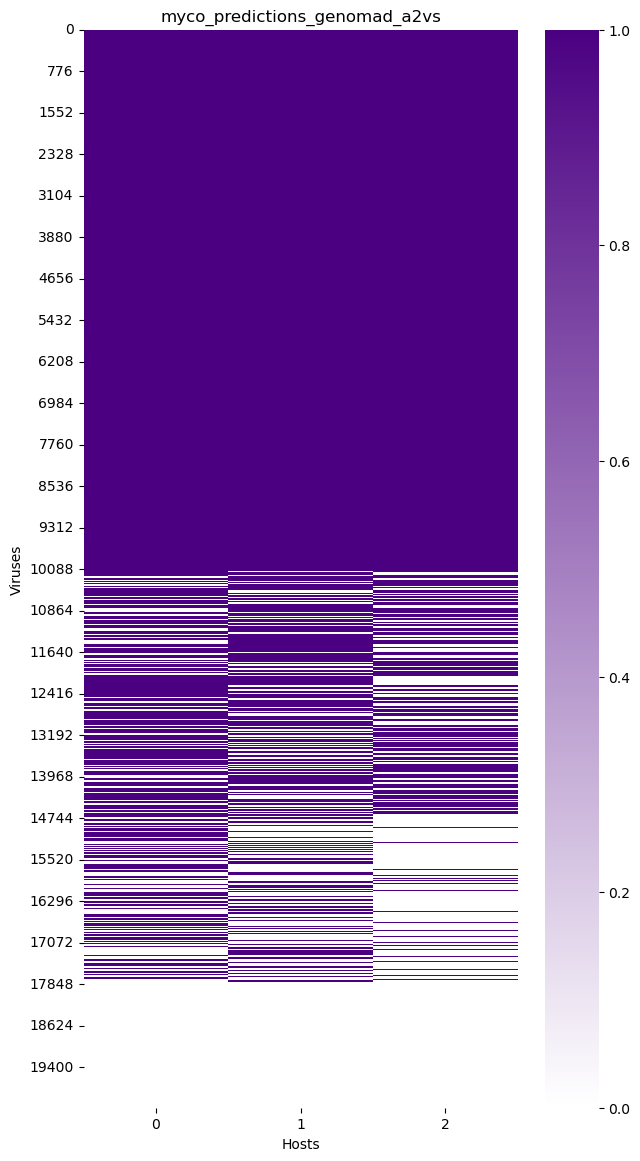

In [5]:
myco_properties = BipartiteGraph(myco)
myco_properties.plot_heatmap()

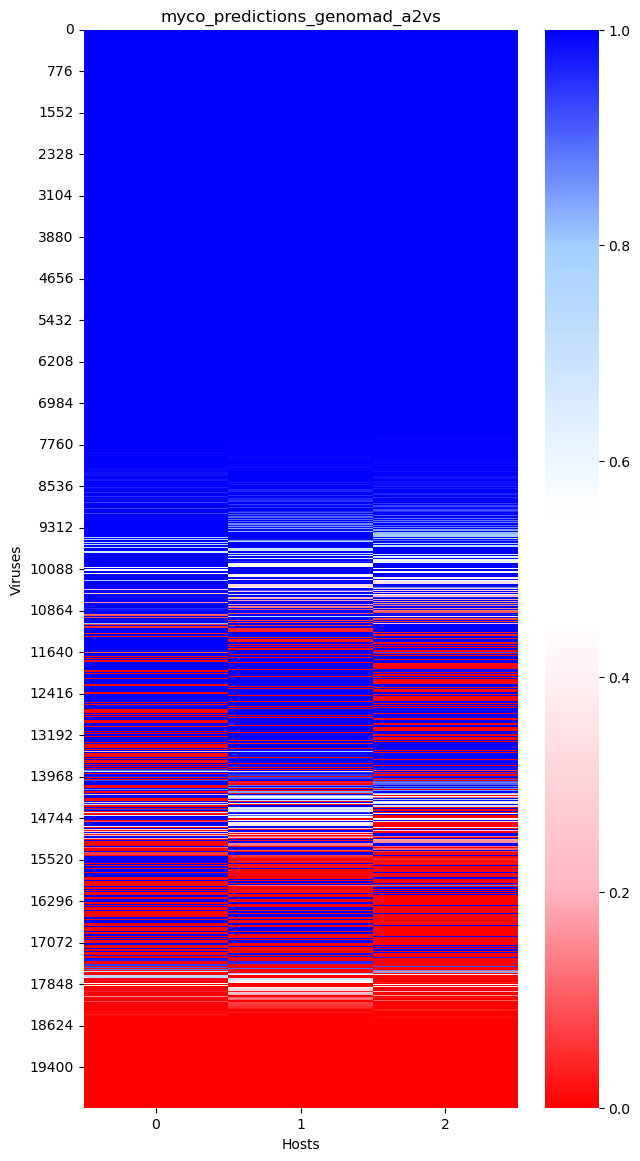

In [7]:
myco_prob = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs.tsv', True)
myco_prob.make_rectangular_matrix()
myco_prob_properties = BipartiteGraph(myco_prob)
myco_prob_properties.plot_heatmap()

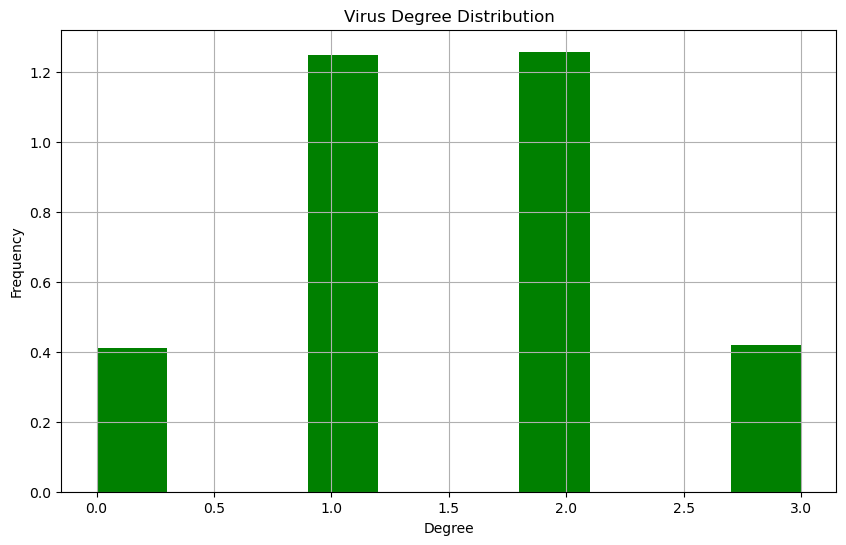

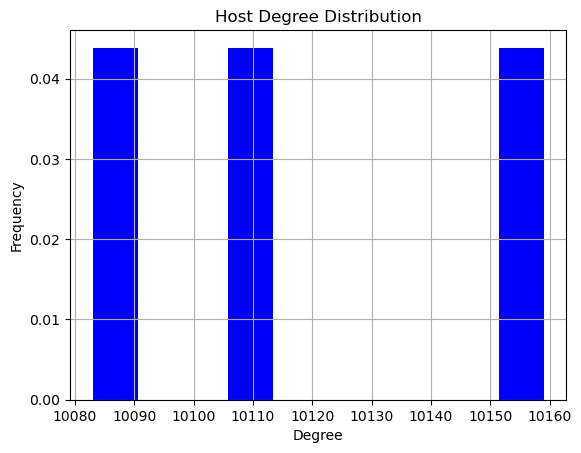

In [13]:
myco_er = ER(myco, 0.5)
myco_er.fill_ER_graph()
myco_er_graph = BipartiteGraph(myco_er)
myco_er_graph.plot_degree_distribution()

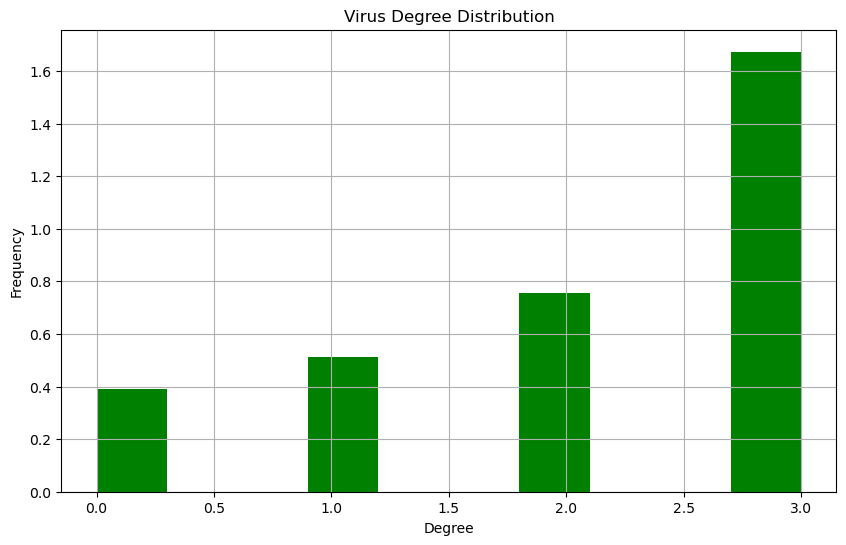

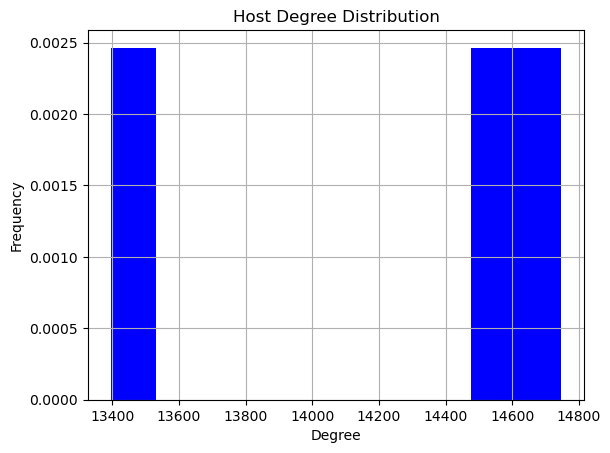

In [14]:
myco_cm = ConfigurationModel(myco)
myco_cm.bootstrap_stats(1000)
myco_cm_graph = BipartiteGraph(myco_cm)
myco_cm_graph.plot_degree_distribution()

### 100 by 2000 subset code is below

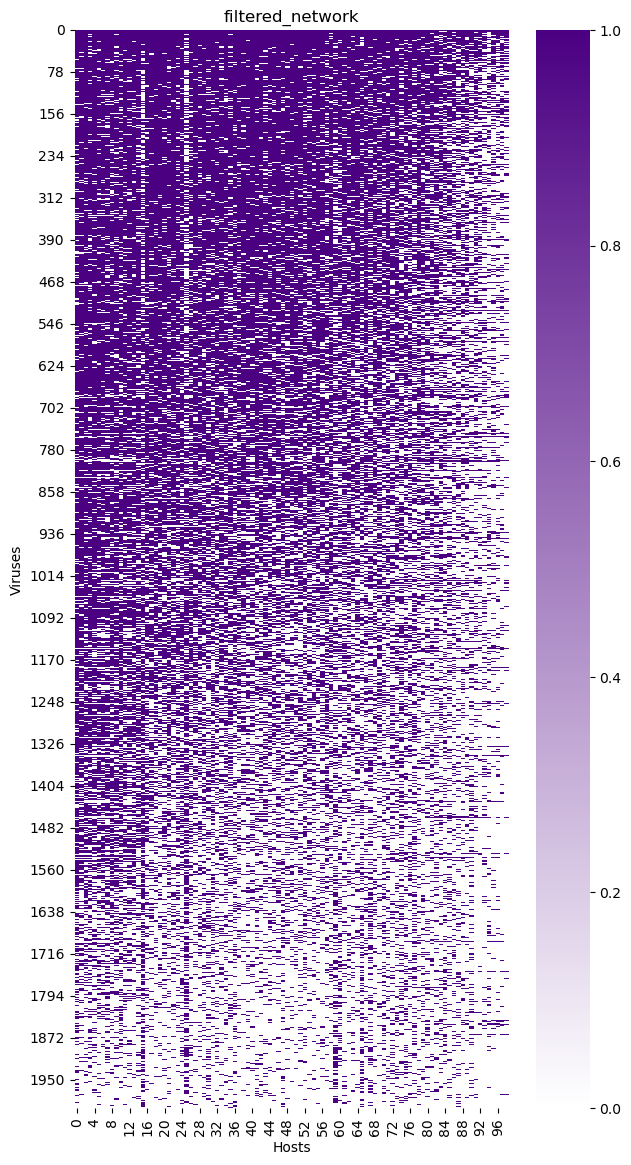

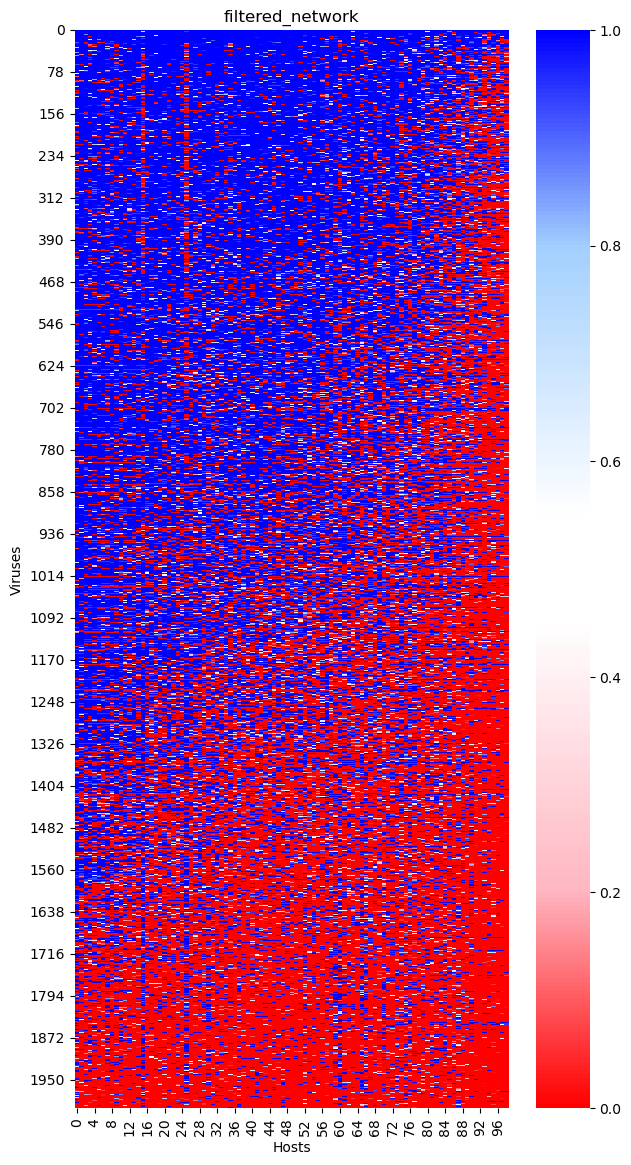

In [15]:
### Large subset 100 x 2000
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix()
filtered_prob = PredictionMatrix('Sample_Input/filtered_network.tsv', True)
filtered_prob.make_rectangular_matrix()
filtered_properties = BipartiteGraph(filtered)
filtered_properties.plot_heatmap()
filtered_prob_properties = BipartiteGraph(filtered_prob)
filtered_prob_properties.plot_heatmap()

In [16]:
filtered_cm = ConfigurationModel(filtered)
filtered_cm.bootstrap_stats(100000)
# filtered_cm_graph = Graph(filtered_cm, filtered.unique_viruses, filtered.unique_hosts)
# filtered_cm_graph.degree_distribution(deg_seq)
# filtered_cm_graph.plot_heatmap()

In [ ]:
calc = Calculations(filtered_cm.matrix_vhip, True)
calc.run_parallel(8)

In [ ]:
filtered_plot = Graph(filtered.virus_host_array, filtered.rows, filtered.columns)
filtered_plot.initialize_graph()
filtered_plot.calculate_centrality(2000, 'eigenvector')
filtered_plot.plot_eigenvectors()
filtered_plot.calculate_centrality(2000, 'closeness')
filtered_plot.plot_closeness()
filtered_plot.calculate_centrality(2000, 'betweenness')
filtered_plot.plot_betweenness()

In [ ]:
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix('prediction')

In [ ]:
cal = Calculations(filtered.virus_host_array, True)
nodf = cal.run_parallel(8)

In [ ]:
print(nodf)

In [ ]:
filtered_cm_1 = CM(filtered.virus_host_array)
filtered_graph = Graph(filtered_cm_1.matrix_vhip, filtered.unique_viruses, filtered.unique_hosts)
filtered_graph.degree_distribution(filtered_cm.bootstrap_stats(1))



In [ ]:
aug4 = PredictionMatrix('Sample_Input/aug4_predictions.tsv')
aug4.make_rectangular_matrix('prediction')
cal_aug4 = Calculations(aug4.virus_host_array, True)
nodf_aug4 = cal_aug4.run_parallel(8)
print(nodf_aug4)

In [ ]:
config_nested = Calculations(filtered_cm.matrix_vhip, True)
nodf = config_nested.run_parallel(8)
print(nodf)